**Team: Sherly Sherly and Alessio Molinari**

Suppose we have 7 points $X_{i} = (x_{i}, y_{i})$ in the 2-dimensional plane:

| i   |   xi  |  yi | 
|---| ----| ----|
| 1 | 1 | 1 |
|2 | 2| 2|
|3 | 2 | 3|
| 4| 7 | 9|
| 5| 7| 7|
|6 | 9| 8|
|7|9|6|


1. Plot the dataset. Each sample $X_{i}$ will be represented with a red diamond.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Dataset plot')

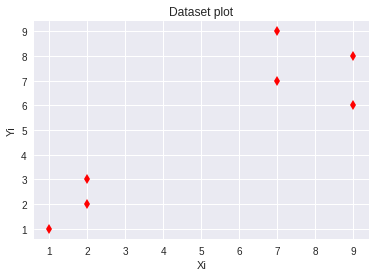

In [2]:
x = [1, 2, 2, 7, 7, 9, 9]
y = [1, 2, 3, 9, 7, 8, 6]

plt.plot(x, y, "rd")
plt.ylabel("Yi")
plt.xlabel("Xi")
plt.title("Dataset plot")

2. Compute the distance between all the samples and store it in the distance matrix $M$ such that $M[i, j]$ is the Euclidean distance between $P_{i} = (x_{i}, y_{i})$ and $P_{j} = (x_{j}, y_{j})$

In [0]:
from sklearn.metrics import pairwise_distances
import numpy as np

coords = np.vstack((x, y)).T
M = np.matrix(pairwise_distances(coords,  metric="euclidean"))

In [4]:
print(M)

[[ 0.          1.41421356  2.23606798 10.          8.48528137 10.63014581
   9.43398113]
 [ 1.41421356  0.          1.          8.60232527  7.07106781  9.21954446
   8.06225775]
 [ 2.23606798  1.          0.          7.81024968  6.40312424  8.60232527
   7.61577311]
 [10.          8.60232527  7.81024968  0.          2.          2.23606798
   3.60555128]
 [ 8.48528137  7.07106781  6.40312424  2.          0.          2.23606798
   2.23606798]
 [10.63014581  9.21954446  8.60232527  2.23606798  2.23606798  0.
   2.        ]
 [ 9.43398113  8.06225775  7.61577311  3.60555128  2.23606798  2.
   0.        ]]


3. Print the matrix with at most 2 decimal places (for instance the value)

In [5]:
np.around(M, 2)

array([[ 0.  ,  1.41,  2.24, 10.  ,  8.49, 10.63,  9.43],
       [ 1.41,  0.  ,  1.  ,  8.6 ,  7.07,  9.22,  8.06],
       [ 2.24,  1.  ,  0.  ,  7.81,  6.4 ,  8.6 ,  7.62],
       [10.  ,  8.6 ,  7.81,  0.  ,  2.  ,  2.24,  3.61],
       [ 8.49,  7.07,  6.4 ,  2.  ,  0.  ,  2.24,  2.24],
       [10.63,  9.22,  8.6 ,  2.24,  2.24,  0.  ,  2.  ],
       [ 9.43,  8.06,  7.62,  3.61,  2.24,  2.  ,  0.  ]])

4. Compute the similarity matrix from by using the Gaussian kernel with $\sigma = 2.1$


$\hspace{20mm}$ The formula for calculating the similarity is given as: $\hspace{10mm}S_{𝑖,𝑗} = S(𝑋_{i}, 𝑋_{j}) = exp(\frac{−||𝑋_{i} − 𝑋_{𝑗}||^{2}}{2𝜎^{2}})$

In [0]:
def generate_sim_matrix(euclid_mat, sigma):
    K=-np.square(euclid_mat)
    K /= (2*sigma**2)
    np.exp(K, K)  
    return K

In [7]:
S = generate_sim_matrix(M, 2.1)
print(S)

[[1.00000000e+00 7.97114163e-01 5.67285018e-01 1.19131410e-05
  2.84930489e-04 2.72841042e-06 4.14632549e-05]
 [7.97114163e-01 1.00000000e+00 8.92812502e-01 2.27122128e-04
  3.45154183e-03 6.52562841e-05 6.30111032e-04]
 [5.67285018e-01 8.92812502e-01 1.00000000e+00 9.91690224e-04
  9.57570539e-03 2.27122128e-04 1.39346237e-03]
 [1.19131410e-05 2.27122128e-04 9.91690224e-04 1.00000000e+00
  6.35390989e-01 5.67285018e-01 2.29025277e-01]
 [2.84930489e-04 3.45154183e-03 9.57570539e-03 6.35390989e-01
  1.00000000e+00 5.67285018e-01 5.67285018e-01]
 [2.72841042e-06 6.52562841e-05 2.27122128e-04 5.67285018e-01
  5.67285018e-01 1.00000000e+00 6.35390989e-01]
 [4.14632549e-05 6.30111032e-04 1.39346237e-03 2.29025277e-01
  5.67285018e-01 6.35390989e-01 1.00000000e+00]]


5.  Print the similarity matrix with at most decimal places.

In [8]:
print(np.around(S, 2))

[[1.   0.8  0.57 0.   0.   0.   0.  ]
 [0.8  1.   0.89 0.   0.   0.   0.  ]
 [0.57 0.89 1.   0.   0.01 0.   0.  ]
 [0.   0.   0.   1.   0.64 0.57 0.23]
 [0.   0.   0.01 0.64 1.   0.57 0.57]
 [0.   0.   0.   0.57 0.57 1.   0.64]
 [0.   0.   0.   0.23 0.57 0.64 1.  ]]


6. Compute the adjacency matrix $W$ of an undirected $\epsilon$-neighbourhood graph, with $\epsilon = 0.5$ based on the similarity matrix $S$

For adjacency matrix based on undirected  $\epsilon$-neighbourhood graph, with $\epsilon = 0.5$ ,

$\hspace{10mm}W = S_{ij}$ if $i \neq j\; and\;S_{i, j} > \epsilon$

$\hspace{10mm}W = 0$ if $i =  j$


In this codes below, we obtained W by filtering all the values less than epsilon (0.5) and subsequently setting the diagonal to 0.

In [0]:
import copy
eps = 0.5

W = copy.deepcopy(S)
W[W < eps] = 0
np.fill_diagonal(W, 0)

In [10]:
print(W)

[[0.         0.79711416 0.56728502 0.         0.         0.
  0.        ]
 [0.79711416 0.         0.8928125  0.         0.         0.
  0.        ]
 [0.56728502 0.8928125  0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.63539099 0.56728502
  0.        ]
 [0.         0.         0.         0.63539099 0.         0.56728502
  0.56728502]
 [0.         0.         0.         0.56728502 0.56728502 0.
  0.63539099]
 [0.         0.         0.         0.         0.56728502 0.63539099
  0.        ]]


7. Plot the graph associated to $W$. To draw a graph, please use the library "networks" on https://networkx.github.io/.

In [11]:
# !pip install networkx==2.2

In [0]:
points = [(str(x+1),str(y+1),(W[x, y])) for x, y in np.argwhere(W != 0)]

In [0]:
import networkx as nx
G = nx.Graph()
G.add_weighted_edges_from(points)

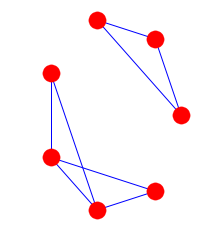

In [14]:
plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), nodecolor='r', edge_color='b')

In the plot above, we observed that there is 2 connected components in the graph.

8. Compute the Laplacian Matrix $L$.

$\hspace{20mm}L = D - W$

$\hspace{10mm}$The weighted adjacency matrix of the graph is the matrix $W = (w_{ij})_{i,j=1,...,n}$. If
$w_{ij} = 0$, the vertices $v_{i}$ and $v_{j}$ are not connected by an edge.


$\hspace{10mm}$The degree matrix $D$ is defined as the diagonal matrix with the degrees $d_{1}$, . . . , $d_{n}$
on the diagonal.     $ d_{i} = \sum_{j=1}^{n}w_{ij}$.


In [15]:
D = np.diag(np.squeeze(np.asarray(W.sum(axis=1))))
print(D)

[[1.36439918 0.         0.         0.         0.         0.
  0.        ]
 [0.         1.68992666 0.         0.         0.         0.
  0.        ]
 [0.         0.         1.46009752 0.         0.         0.
  0.        ]
 [0.         0.         0.         1.20267601 0.         0.
  0.        ]
 [0.         0.         0.         0.         1.76996103 0.
  0.        ]
 [0.         0.         0.         0.         0.         1.76996103
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.20267601]]


In [16]:
L = D - W
print(L)

[[ 1.36439918 -0.79711416 -0.56728502  0.          0.          0.
   0.        ]
 [-0.79711416  1.68992666 -0.8928125   0.          0.          0.
   0.        ]
 [-0.56728502 -0.8928125   1.46009752  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.20267601 -0.63539099 -0.56728502
   0.        ]
 [ 0.          0.          0.         -0.63539099  1.76996103 -0.56728502
  -0.56728502]
 [ 0.          0.          0.         -0.56728502 -0.56728502  1.76996103
  -0.63539099]
 [ 0.          0.          0.          0.         -0.56728502 -0.63539099
   1.20267601]]


9. Compute the eigenvalues and eigenvectors of  $L$.

10. Sort the eigenvalues and the eigenvectors in increasing order.

In [24]:
from scipy import sparse
eigval, eigvec = sparse.linalg.eigsh(L, 7, sigma=0, which='LM')
print("Eigenvalues:\n", eigval)
print()
print()
print("Eigenvectors:\n", eigvec)

Eigenvalues:
 [8.88178420e-16 4.44089210e-15 1.19860237e+00 1.96742922e+00
 2.34131968e+00 2.40535201e+00 2.54699414e+00]


Eigenvectors:
 [[-0.57735027  0.          0.          0.75868232  0.          0.
   0.30177441]
 [-0.57735027  0.          0.         -0.11799685  0.          0.
  -0.80792537]
 [-0.57735027  0.          0.         -0.64068547  0.          0.
   0.50615096]
 [ 0.         -0.5         0.70584528  0.         -0.0422189   0.5
   0.        ]
 [ 0.         -0.5         0.0422189   0.          0.70584528 -0.5
   0.        ]
 [ 0.         -0.5        -0.0422189   0.         -0.70584528 -0.5
   0.        ]
 [ 0.         -0.5        -0.70584528  0.          0.0422189   0.5
   0.        ]]


/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1556: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  RuntimeWarning)


Laplacian matrix is a real symmetric square matrix, in this case we utilise `linalg.eigsh` to compute the eigenvalues. The values are sorted in ascending order by default.

11. Plot the eigenvalues in increasing order. What do you observe?

Text(0.5,1,'Plot of Eigenvalues')

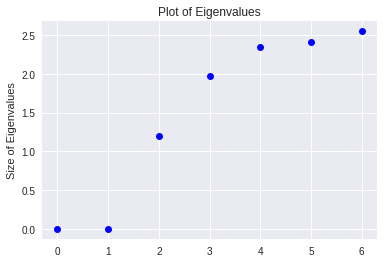

In [18]:
plt.plot(eigval, "bo")
plt.ylabel("Size of Eigenvalues")
plt.title("Plot of Eigenvalues")

We observe that we have 2 zero eigenvalues. In this case, this corresponds to the fact that we have 2 connected components in our graph. 

12. Plot the first eigenvector (associated to the smallest eigenvalue) and the second eigenvector (associated to the second smallest eigenvalue) on the same graph. What do you observe?

Text(0.5,1,'Plot of eigenvectors')

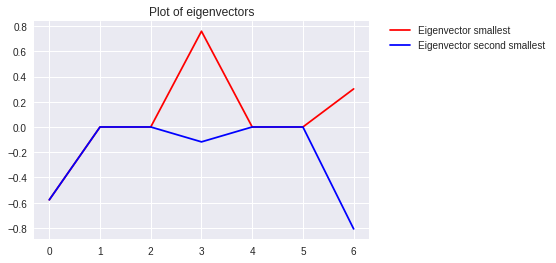

In [19]:
plt.plot(eigvec[0], "r-", label="Eigenvector smallest")
plt.plot(eigvec[1], "b-", label="Eigenvector second smallest")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Plot of eigenvectors")

13. In latex, prove theoretically what you have observed in the previous question.

For a matrix $A$ , we have eigenvectors $v$ for which:

$\hspace{10mm}Av = \lambda v$

The solution to eigenvectors:  
$\hspace{10mm}Av =\lambda v \Leftrightarrow (A-\lambda I)v = 0$

In our case, we observe that there are 2 $\lambda = 0$, i.e. the multiplicity is 2.  

According to the Rank-Nullity Theorem:  
$\hspace{10mm}dim(A) = rank(A) + nullity(A)$

$dim(A) = 7$ and $rank(A) = 5 $ since there are 5 non-zero eigenvalues.

Since the nullity is 2, we observe in the graph above that there are two components between the two eigenvectors that deviates from each other i.e. index 3 and 6.

14. Propose a thresholding mechanism based on the mean value of the second eigenvector to associate a label to each sample. This label takes the value -1 if the sample is assigned to the first cluster and +1 if ithe sample is assigned to the second cluster.

We propose a thresholding by centering the values of the eigenvectors. 


We adjusted the eigenvectors by centering it i.e. value - mean and split the clusters according to whether it is positive or negative. 

In [20]:
mean_adjusted_eigvec = eigvec[1] - np.mean(eigvec[1])
mean_adjusted_eigvec

array([-0.36259706,  0.21475321,  0.21475321,  0.09675636,  0.21475321,
        0.21475321, -0.59317216])

15. Draw the clustering. The samples of the first cluster are drawn with blue circles and the
samples of the second cluster are drawn with red circles.

In [0]:
pos_idx = np.where(mean_adjusted_eigvec > 0)
neg_idx = np.where(mean_adjusted_eigvec <= 0)

In [0]:
x_pos = [x[i] for i in pos_idx[0]]
y_pos = [y[i] for i in pos_idx[0]]

x_neg = [x[i] for i in neg_idx[0]]
y_neg = [y[i] for i in neg_idx[0]]

Text(0.5,1,'Plot of clusters')

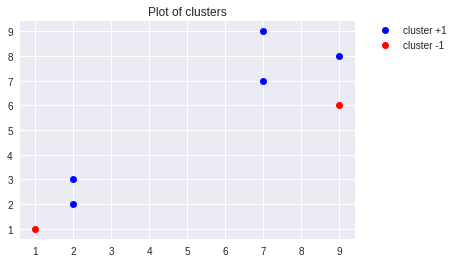

In [23]:
plt.plot(x_pos, y_pos, "bo", label="cluster +1")
plt.plot(x_neg, y_neg, "ro", label="cluster -1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Plot of clusters")

By Spectral Clustering, we obtain the two clusters based on the eigenvalues as shown above.